In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(101)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape


(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data["Pclass"].unique()

array([3, 1, 2])

In [ ]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

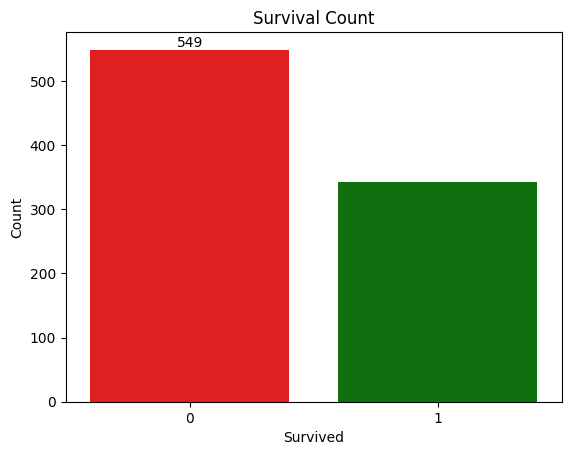

In [ ]:
data1=data["Survived"].value_counts().reset_index()
data1.columns=["Survived","Count"]
bar1=sns.barplot(x=data1["Survived"],y=data1["Count"],palette=['r','g'])
bar1.bar_label(bar1.containers[0])
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

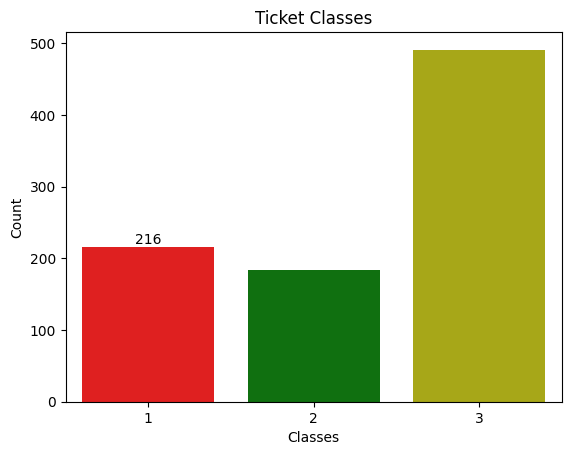

In [ ]:
data2=data["Pclass"].value_counts().reset_index()
data2.columns=["Pclass","Count"]
bar2=sns.barplot(x=data2["Pclass"],y=data2["Count"],palette=['r','g','y'])
bar2.bar_label(bar2.containers[0])
plt.title("Ticket Classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

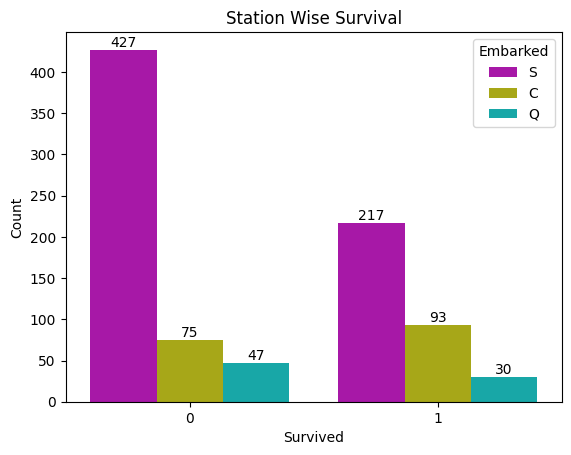

In [ ]:
data3=data[["Survived","Embarked"]].value_counts().reset_index()
data3.columns=["Survived","Embarked","Count"]
bar3=sns.barplot(x=data3["Survived"],y=data3["Count"],hue=data3["Embarked"],palette=['m','y','c'])
bar3.bar_label(bar3.containers[0])
bar3.bar_label(bar3.containers[1])
bar3.bar_label(bar3.containers[2])
plt.title("Station Wise Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

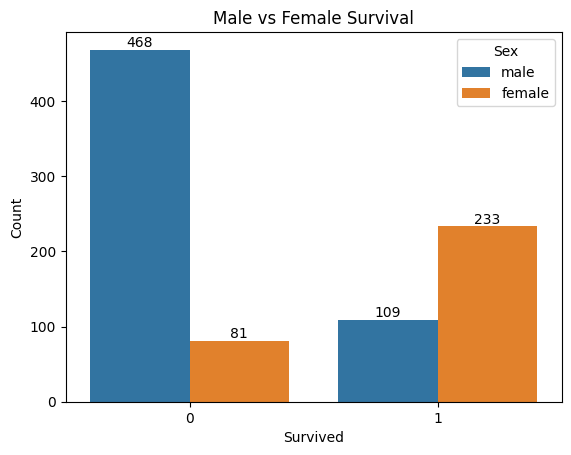

In [ ]:
data4=data[["Survived","Sex"]].value_counts().reset_index()
data4.columns=["Survived","Sex","Count"]
bar4=sns.barplot(x=data4["Survived"],y=data4["Count"],hue=data4["Sex"])
bar4.bar_label(bar4.containers[0])
bar4.bar_label(bar4.containers[1])
plt.title("Male vs Female Survival")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

In [ ]:
data["Sex"]=data["Sex"].map({"male":1,"female":0})
data["Embarked"]=data["Embarked"].map({"S":0,"C":1,"Q":2})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN,NaN


In [ ]:
le=LabelEncoder()
data["Name"]=le.fit_transform(data["Name"])
data["Ticket"]=le.fit_transform(data["Ticket"])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,male,22.0,1,0,523,7.2500,NaN,S
1,2,1,1,190,female,38.0,1,0,596,71.2833,C85,C
2,3,1,3,353,female,26.0,0,0,669,7.9250,NaN,S
3,4,1,1,272,female,35.0,1,0,49,53.1000,C123,S
4,5,0,3,15,male,35.0,0,0,472,8.0500,NaN,S


In [ ]:
data['Age'].fillna(data["Age"].median(), inplace=True)
data['Age'].isnull().sum()

0

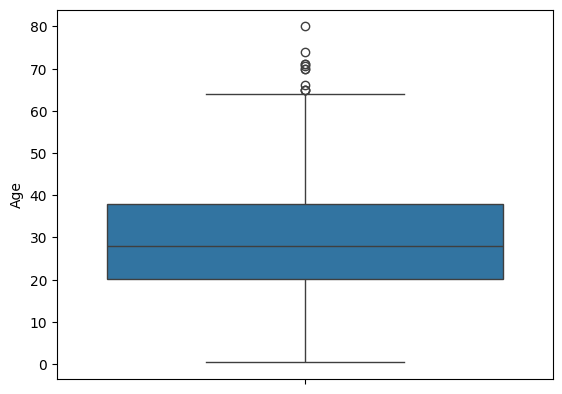

In [ ]:
sns.boxplot(y=data["Age"])
plt.show()

In [ ]:
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data["Embarked"].isnull().sum()

0

In [ ]:
data["Age"]=data["Age"].astype(int)
data["Fare"]=data["Fare"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   SibSp     891 non-null    int64 
 5   Parch     891 non-null    int64 
 6   Fare      891 non-null    int64 
 7   Embarked  891 non-null    object
dtypes: int64(6), object(2)
memory usage: 55.8+ KB


In [ ]:
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,male,22.0,1,0,523,7.2500,S
1,2,1,1,190,female,38.0,1,0,596,71.2833,C
2,3,1,3,353,female,26.0,0,0,669,7.9250,S
3,4,1,1,272,female,35.0,1,0,49,53.1000,S
4,5,0,3,15,male,35.0,0,0,472,8.0500,S


In [ ]:

features=data.drop("Survived",axis=1)
target=data["Survived"]
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7,S
1,1,female,38,1,0,71,C
2,3,female,26,0,0,7,S
3,1,female,35,1,0,53,S
4,3,male,35,0,0,8,S


In [ ]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=24)
x_train.shape

(623, 7)

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")
pclass=3
sex=0
age=30
fare=9
embarked=0
new_data=[[pclass,sex,age,fare,embarked]]
pred=(new_data)
if(pred[0]==0):
    print("Not Survived")
else:
    print("Survived")

Survived
